# Introducton to Regression with Neural Networks in TensorFlow

There are many definition for a a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... prediciting a number

In [ ]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit


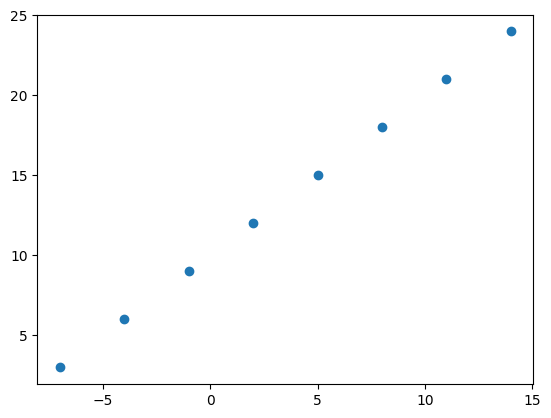

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array(([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0]))

# Create labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#  Visualize it

plt.scatter(X, y);


In [ ]:
 y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes


In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
 X[0].ndim

0

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

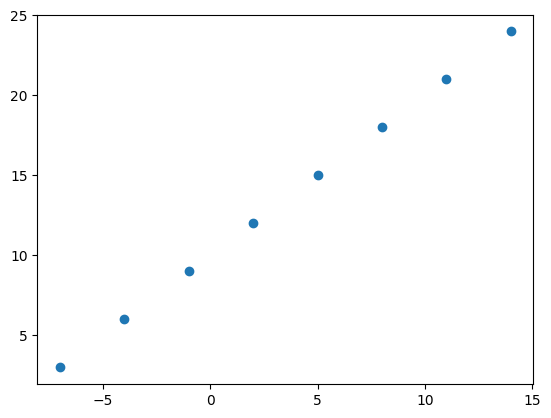

In [ ]:
plt.scatter(X,y)

## STEPS IN MODELLING WITH TENSORFLOW

1.**Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2.**Compiling a model** - define the loss function (in others word, the function which tells out model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3.**Fitting a model** - letting the model try to find patterns between X & y (features and labels)|

In [ ]:
# # Optionally, the firs layer can recieve an 'input_shape' argumnent:
# model = tf.keras.Sequental()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16, )))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(1))

In [ ]:
  # Set random seed
  tf.random.set_seed(42)

  # 1 Create a model using the Sequential API

  model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
  ])

# 2 Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute errror
              optimizer=tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics=['mae'])

# 3 Fit the model

model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 701ms/step - loss: 18.2435 - mae: 18.2435
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 17.9623 - mae: 17.9623
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 17.6810 - mae: 17.6810
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 17.3998 - mae: 17.3998
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 17.1185 - mae: 17.1185


In [ ]:
#Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 132ms/step


array([[-13.288512]], dtype=float32)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 59ms/step


array([[-13.288512]], dtype=float32)

In [ ]:
y_pred +11

array([[-2.2885122]], dtype=float32)

## improving our model

We canimprove our model, by altering the steps we took to create a model.

1. **Creating a model** - here might add more layers. increase the number of hidden units (all called neurons) whithin each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1.Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0121),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 872ms/step - loss: 13.8581 - mae: 13.8581
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.1096 - mae: 13.1096
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.3539 - mae: 12.3539
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5865 - mae: 11.5865
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 10.8039 - mae: 10.8039
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0013 - mae: 10.0013
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1739 - mae: 9.1739
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 8.3169 - mae: 8.3169
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4256 - mae: 7.4256
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7759 - mae: 6.7759
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 153ms/step


array([[26.58668]], dtype=float32)

## Evaluting a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation ... there are 3 words you should memorize:

> "Visualize, visualize, visualize":

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?



In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

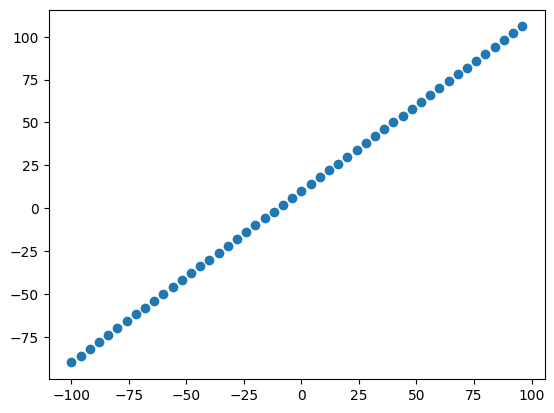

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...
* **Trainig set** - the model learns from this data, which is typicaly 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available
❗



In [ ]:
# Check the length of how many samples we have

len(X)

50

In [ ]:
# Split the data into train and test sets

X_train = X[:40]
y_train = y[:40]

X_test =  X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

now we've got our data in training and test sets... let's visualize it again!

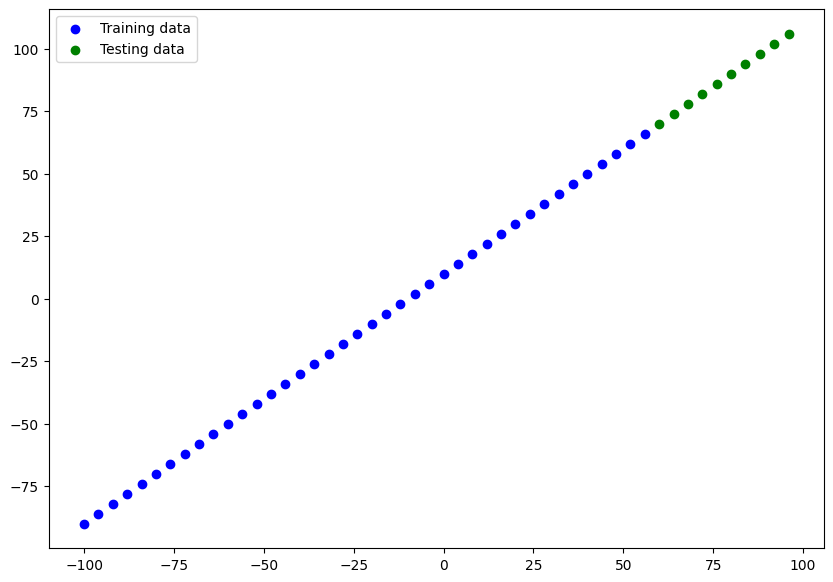

In [ ]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)


### Visualizing the model


In [ ]:
# model.build()
# model.summary()

In [ ]:
# Let's create a model which buils automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="test1")

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "test1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you vring in already learn patterns or parameters from other models during **transfer learning**)

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "test1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


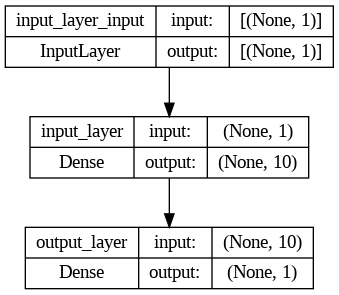

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [ ]:
# Make some predictions
y_pred  = model.predict(X_test)
y_pred

y_pred

1/1 [==============================] - 0s 118ms/step


array([[ 75.77167 ],
       [ 80.70784 ],
       [ 85.64401 ],
       [ 90.58019 ],
       [ 95.51637 ],
       [100.45256 ],
       [105.388725],
       [110.324905],
       [115.26108 ],
       [120.19725 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** if you feel like you are going to resuse some kind of functionality in the future, it's good idea to turn it into a function


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")

    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # Show the legend
    plt.legend();


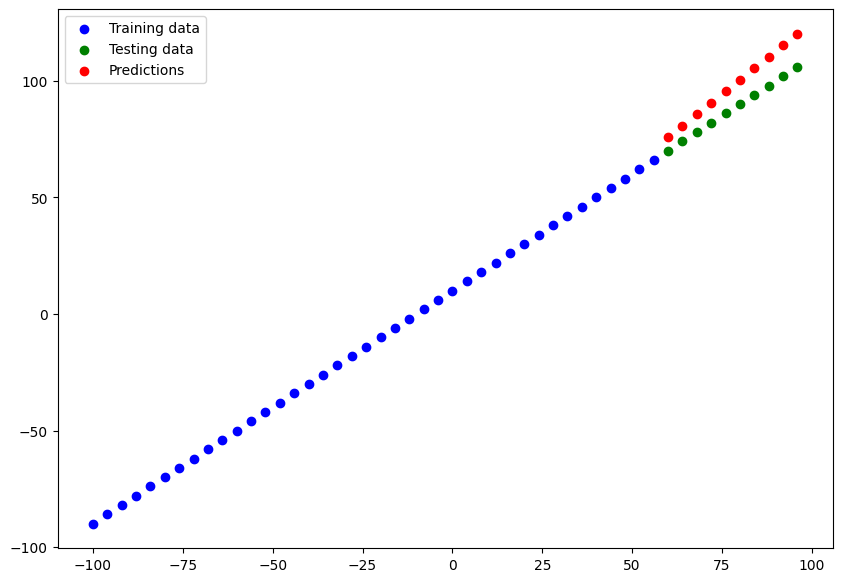

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performace.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

```
When?
```
```
MAE -  As a great starter metric for any regression problem.
```
```
MSA -When larger errors are more significant than smaller errors.
```

MAE - tf.keras.losses.MAE()

MSA - tf.keras.losses.MSE()

In [ ]:
# Evaluate the model on the test

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 250ms/step - loss: 9.9845 - mae: 9.9845


[9.984458923339844, 9.984458923339844]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.7369995, 11.316864 , 10.0711975, 10.116038 , 11.406549 ,
       13.871536 , 17.51098  , 22.324905 , 27.261078 , 32.19725  ],
      dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.77167 ,  80.70784 ,  85.64401 ,  90.58019 ,  95.51637 ,
       100.45256 , 105.388725, 110.324905, 115.26108 , 120.19725 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=9.984461>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=106.91997>

In [ ]:
# Make some functions to resue MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test,
                                         y_pred=tf.squeeze(y_pred))

### Runnning experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make yout model larger (using a more complex model) - this might come in the form of mroe layers or more hidden units in each layer.
3. Train for longer - give your model more of a chacne to find the patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs



In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Build model_1

# Set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

1/1 [==============================] - 0s 79ms/step


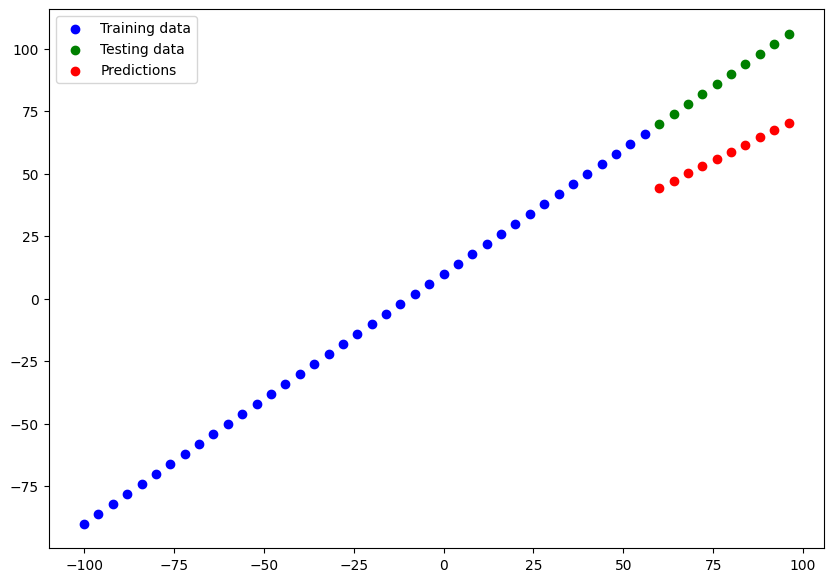

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evalutaion metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.660666>,
 <tf.Tensor: shape=(), dtype=float32, numpy=950.5338>)

In [ ]:
# model_2

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

1/1 [==============================] - 0s 74ms/step


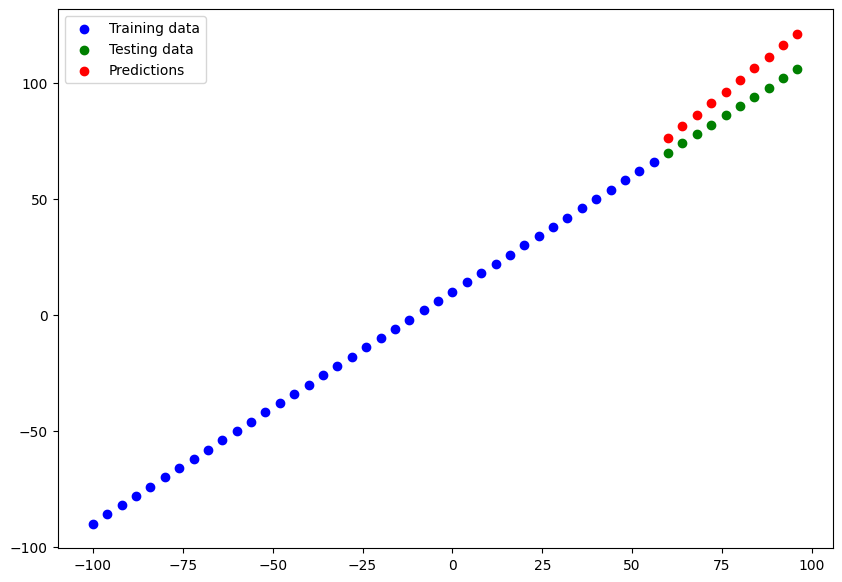

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.802755>,
 <tf.Tensor: shape=(), dtype=float32, numpy=124.602615>)

In [ ]:
# Model_3

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

1/1 [==============================] - 0s 117ms/step


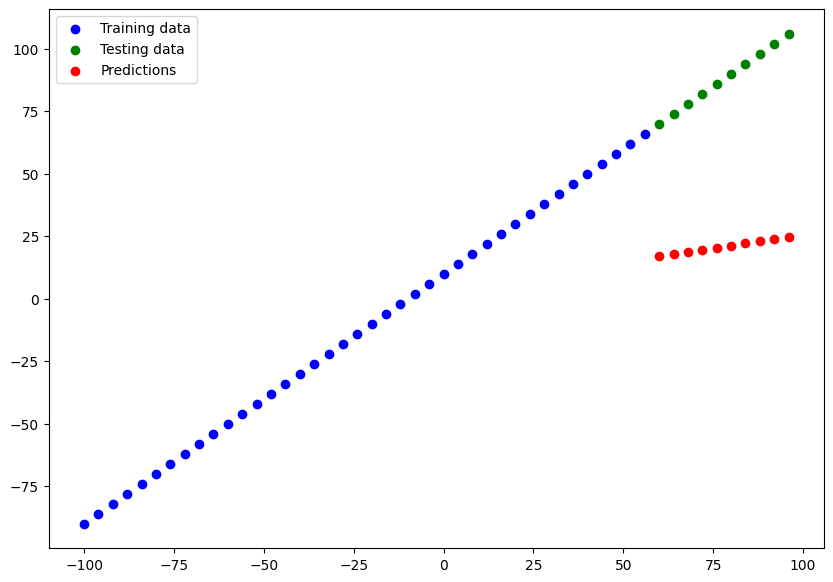

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.12098>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4587.6787>)

## Comparing the result of our experiments

We've run a few experminets let's compare the results.

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.660666,950.533813
1,model_2,10.802755,124.602615
2,model_3,67.120979,4587.678711


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're runnning lots of experiments.

Luckily, there are tools to help us!



Looks like mode l_2 performed the best


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your experiments

One really good habit inmachine learning modelling is to track the result of our experiments.

And when doing so, it can be tedious if you're running lots experiments.

Luckily, there are tools to help:

* Tensorboard - a component of the TensorFlow library to help track modelling experiments.

* Weights& Biases - a tool for tracking all of kindsof machine learning experiments (plugs straight into TensorBoard).

#     

### Saving our models

Saving our models allows us to use them outside such as in a web application or a mobile app.

There are two main formats we can save our models's too:

1. The SavedModel format
2. The HDF5 format


In [ ]:
# Save model using the SavedModel format
model_2.save("model_SaveModel")

In [ ]:
# Save model using the HD5 file

model_2.save("model_HD5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/model_SaveModel")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
 # Compare model_2 predicitions with SavedModel format model predictions

 model_2_preds = model_2.predict(X_test)
 loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

 model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 21ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_2 preds and loaded_saved format

mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
    # Load in a model using the .H5 format

loaded_h5_model = tf.keras.models.load_model("/content/model_HD5.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 65ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or any other file) from Google Colab

If you want to downoad your files from Google Colab:

1. You can go to the "files" tab and right click on the file you are after and click download

2.  Use code below

3. Save it to Google Drive by connecting Google Drive and copying in there (see 2nd code cell below)

In [ ]:
# Download a file from Google Colab

from google.colab import files

files.download("/content/model_HD5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 # Save model to Google Drive (requires mounting google drive)

!cp /content/model_HD5.h5 /content/drive/MyDrive/STUDIA/UM/TensorFlow_course



In [ ]:
!ls /content/drive/MyDrive/STUDIA/UM/TensorFlow_course

model_HD5.h5


 ### A larger example

In [ ]:
# Import required librares

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the inssurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our dataFrame so its all numbers

insurance_one_hot = pd.get_dummies(insurance)

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
 # Create a training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

 # 1. Create a model

insurance_model = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)

 ])

 # Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])

 # 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)


In [ ]:
# Check the results of the insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8870.7383 - mae: 8870.7383


[8870.73828125, 8870.73828125]

In [ ]:
np.median(y_train), np.mean(y_train)


(9575.442, 13346.09)

To try imporve model we'll run 2 experiments:
1. add an extra layer with more hidden units and use the Adam optimizer
2. train for longer
3. change optimizer

In [ ]:
# 1

tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100,verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13277.1953 - mae: 13277.1953
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13080.4873 - mae: 13080.4873
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12669.0635 - mae: 12669.0635
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11885.9697 - mae: 11885.9697
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10644.8613 - mae: 10644.8613
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9178.8027 - mae: 9178.8027
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7972.6348 - mae: 7972.6348
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7517.1372 - mae: 7517.1372
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7454.5420 - mae: 7454.5420
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7434.8149 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4782.7793 - mae: 4782.7793


[4782.779296875, 4782.779296875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8870.7383 - mae: 8870.7383


[8870.73828125, 8870.73828125]

In [ ]:
# 2


tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=400,verbose=1)

Epoch 1/400
34/34 [==============================] - 1s 3ms/step - loss: 13274.6104 - mae: 13274.6104
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 13069.4844 - mae: 13069.4844
Epoch 3/400
34/34 [==============================] - 0s 4ms/step - loss: 12635.4248 - mae: 12635.4248
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 11815.7881 - mae: 11815.7881
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 10539.5996 - mae: 10539.5996
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 9059.8018 - mae: 9059.8018
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 7888.5410 - mae: 7888.5410
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 7487.1260 - mae: 7487.1260
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 7430.9531 - mae: 7430.9531
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 7410.7529 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3158.2461 - mae: 3158.2461


[3158.24609375, 3158.24609375]



* epochs 200
[3488.684814453125, 3488.684814453125]

* epochs 300
[3236.795654296875, 3236.795654296875]

* epochs 400
[3159.7939453125, 3159.7939453125]




Text(0.5, 0, 'epochs')

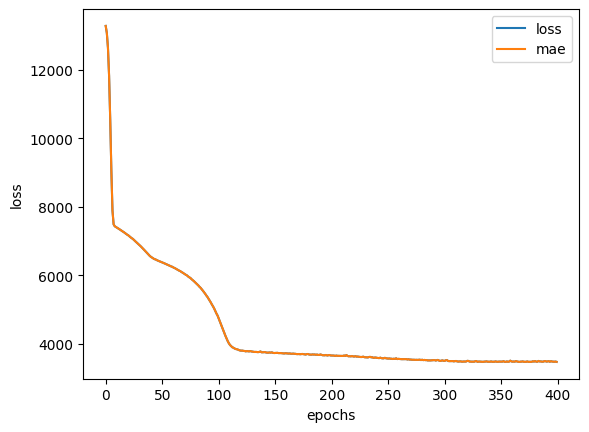

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# [Earlystopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

component you can add to your model to  stop training once it stops improving a certain meric.


### Preprocesing data (normalization and standardization)

In terms of scalling values, neural network tend to prefer normalization.

If you're not sure which to use, you could try both and see which perform is best

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to prepare our data, we can borrow a few classes from Scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker','region'])
)

# Create X & y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data

ct.fit(X_train)

# transorm training and test data with normalization (minMaxScaler) and onehotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build a neural network model to fit on our normalized data

In [ ]:
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:

tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=400,verbose=1)

Epoch 1/400
34/34 [==============================] - 1s 2ms/step - loss: 13343.5605 - mae: 13343.5605
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 13335.0107 - mae: 13335.0107
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 13313.4492 - mae: 13313.4492
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 13268.2139 - mae: 13268.2139
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 13188.6152 - mae: 13188.6152
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 13064.1416 - mae: 13064.1416
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 12884.6943 - mae: 12884.6943
Epoch 8/400
34/34 [==============================] - 0s 4ms/step - loss: 12640.1826 - mae: 12640.1826
Epoch 9/400
34/34 [==============================] - 0s 4ms/step - loss: 12320.3662 - mae: 12320.3662
Epoch 10/400
34/34 [==============================] - 0s 3ms/step - loss: 11921.15

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3158.8350 - mae: 3158.8350


[3158.8349609375, 3158.8349609375]

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).